In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, centers=[[-1,-1], [1,1]])
y[np.where(y == 0)] = -1

The Soft-SVM problem is written as:
\begin{align*}
    \min_{w} \left(\frac{\lambda}{2} \|w\|^2_2 + \frac{1}{m} \sum_{i=1}^m \max\{0, 1 - y \langle w, x_i \rangle\}\right)
\end{align*}

In [3]:
clf = SVC(kernel='linear', C=1).fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[[1.4687544  1.16114936]]
[-0.04944031]


In [4]:
#clf = SGDClassifier(loss='hinge', penalty=None).fit(X, y)
#print(clf.coef_)
#print(clf.intercept_)

In [5]:
X = np.c_[X, np.ones(X.shape[0])]

In [14]:
np.random.seed(42)
#m = X.shape[0]
m = 1
lbd = 1e-2
eta = 0.1
T = 1800

w = np.zeros((T, 3))
theta = np.zeros(3)
for t in range(1, T+1):
    w[t-1] = 1/(lbd*t) * theta
    #w[t-1] = 1/lbd * theta
    
    idxs = np.random.choice(np.arange(X.shape[0]), size=m)
    
    for i in idxs:
        #if y[i] != np.sign(w[t-1] @ X[i]):
        if y[i] * (w[t-1] @ X[i]) < 1:
            #theta = theta + eta * y[i] * X[i]
            theta = theta + y[i] * X[i]

w = np.mean(w, axis=0)
#w /= np.linalg.norm(w, 2)
print(w)

[1.79565816 1.67161171 0.11009828]


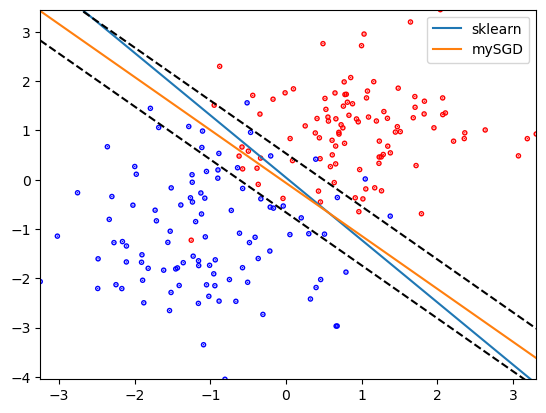

In [15]:
#xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
#yy = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)

xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
plt.scatter(*X.T, c=y, cmap=plt.cm.bwr, linewidths=3)

wc = clf.coef_[0]
a = -wc[0] / wc[1]
yy = a * xx - clf.intercept_[0] / wc[1]
plt.plot(xx, yy, label="sklearn")

a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - w[2] / w[1]
plt.plot(xx, yy, label="mySGD")

m = 1/np.linalg.norm(w)
lo_support_plane = yy - np.sqrt(1 + a**2) * m
hi_support_plane = yy + np.sqrt(1 + a**2) * m

plt.plot(xx, lo_support_plane, "k--")
plt.plot(xx, hi_support_plane, "k--")

#plt.plot(xx, xs @ w)
plt.xlim(np.min(X[:, 0]), np.max(X[:, 0]))
plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.legend()